In [85]:
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
meta_df=pd.read_csv('/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/metadata/metadata_df+eth+gender.csv',index_col=0)

In [9]:
meta_df

,basename,extraversion,neuroticism,agreeableness,conscientiousness,openness,Partition,labels_mean,yamnet_no_music_20+speech_rate_>0.5,yamnet_no_music_20+speech_rate_>0.6,yamnet_no_music_20+speech_rate_>0.7,yamnet_no_music_20+speech_rate_>0.8,yamnet_no_music_20+speech_rate_>0.9,silero_speech_rate>0.5,silero_speech_rate>0.6,silero_speech_rate>0.7,silero_speech_rate>0.8,silero_speech_rate>0.9,ethnicity,gender
filename,,,,,,,,,,,,,,,,,,,,
mDRMCwSD3Ms.001.wav,mDRMCwSD3Ms,0.579439,0.697917,0.736264,0.766990,0.588889,Val,0.673900,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1
nUazOUcW_AM.002.wav,nUazOUcW_AM,0.476636,0.687500,0.582418,0.699029,0.711111,Val,0.631339,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,2
8AnIttmflwI.000.wav,8AnIttmflwI,0.532710,0.572917,0.637363,0.553398,0.511111,Val,0.561500,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2,1
XB81sertsYU.004.wav,XB81sertsYU,0.588785,0.510417,0.648352,0.466019,0.666667,Val,0.576048,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2,2
alucqviYJFE.005.wav,alucqviYJFE,0.514019,0.572917,0.527473,0.601942,0.688889,Val,0.581048,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SkNO4x-LSgE.001.wav,SkNO4x-LSgE,0.598131,0.635417,0.747253,0.582524,0.555556,Test,0.623776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
QdafN9Y_j-Y.003.wav,QdafN9Y_j-Y,0.467290,0.406250,0.593407,0.514563,0.533333,Test,0.502969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
JJs_HTelie4.000.wav,JJs_HTelie4,0.570093,0.760417,0.659341,0.601942,0.688889,Test,0.656136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2


Gender: Male=1, Female=2

In [28]:
dim_male=meta_df[meta_df.gender==1].shape[0]
dim_female=meta_df[meta_df.gender==2].shape[0]
print('Male samples:%d \nFemale samples:%d' % (dim_male, dim_female))

Male samples:4538 
Female samples:5462


In [32]:
meta_df.loc[meta_df.gender==1,'gender_tag']='Male'
meta_df.loc[meta_df.gender==2,'gender_tag']='Female'

Ethnicity: Asian=1,Caucasian=2,African-American=3

In [104]:
asian=meta_df[meta_df.ethnicity==1].shape[0]
caucasian=meta_df[meta_df.ethnicity==2].shape[0]
african_american=meta_df[meta_df.ethnicity==3].shape[0]
print('Asian:%d \nCaucasian:%d \nAfrican-American:%d' % (asian, caucasian,african_american))

meta_df.loc[meta_df.ethnicity==1,'ethnicity_tag']='Asian'
meta_df.loc[meta_df.ethnicity==2,'ethnicity_tag']='Caucasian'
meta_df.loc[meta_df.ethnicity==3,'ethnicity_tag']='African-American'

Asian:331 
Caucasian:8598 
African-American:1071


# Gender

Per-gender Mean of label means 

In [46]:
labels_mean=pd.DataFrame(meta_df.groupby('gender_tag')['labels_mean'].mean())
o=pd.DataFrame(meta_df.groupby('gender_tag')['openness'].mean())
c=pd.DataFrame(meta_df.groupby('gender_tag')['conscientiousness'].mean())
e=pd.DataFrame(meta_df.groupby('gender_tag')['extraversion'].mean())
a=pd.DataFrame(meta_df.groupby('gender_tag')['agreeableness'].mean())
n=pd.DataFrame(meta_df.groupby('gender_tag')['neuroticism'].mean())

In [67]:
to_merge_list=[o,c,e,a,n,labels_mean]

In [93]:
data_merge = reduce(lambda left, right:     # Merge DataFrames in list
                     pd.merge(left , right,
                              on = ['gender_tag'],
                              how = "outer"),
                     to_merge_list)
plot_data=pd.DataFrame(data_merge)      
plot_data=plot_data.melt(ignore_index=False).reset_index()
plot_data=plot_data.rename(columns={'variable':'Personality','value':'mean_value'})

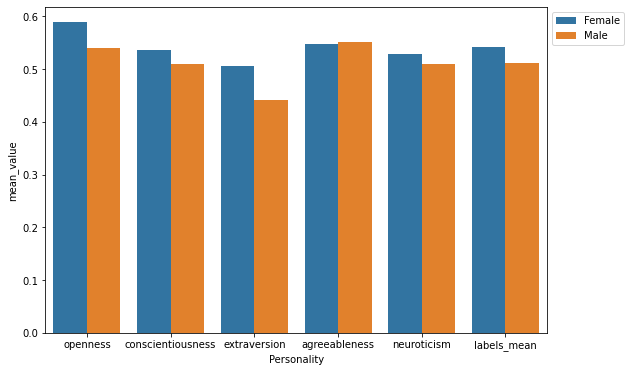

In [95]:
plt.figure(figsize=(9, 6))
sns.barplot(plot_data,x='Personality',y='mean_value',hue='gender_tag')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Ethnicity

In [107]:
eth_labels_mean=pd.DataFrame(meta_df.groupby('ethnicity_tag')['labels_mean'].mean())
eth_o=pd.DataFrame(meta_df.groupby('ethnicity_tag')['openness'].mean())
eth_c=pd.DataFrame(meta_df.groupby('ethnicity_tag')['conscientiousness'].mean())
eth_e=pd.DataFrame(meta_df.groupby('ethnicity_tag')['extraversion'].mean())
eth_a=pd.DataFrame(meta_df.groupby('ethnicity_tag')['agreeableness'].mean())
eth_n=pd.DataFrame(meta_df.groupby('ethnicity_tag')['neuroticism'].mean())

In [108]:
to_merge_list_eth=[eth_o,eth_c,eth_e,eth_a,eth_n,eth_labels_mean]

In [110]:
data_merge_eth = reduce(lambda left, right:     # Merge DataFrames in list
                     pd.merge(left , right,
                              on = ['ethnicity_tag'],
                              how = "outer"),
                     to_merge_list_eth)
plot_data_eth=pd.DataFrame(data_merge_eth)      
plot_data_eth=plot_data_eth.melt(ignore_index=False).reset_index()
plot_data_eth=plot_data_eth.rename(columns={'variable':'Personality','value':'mean_value'})

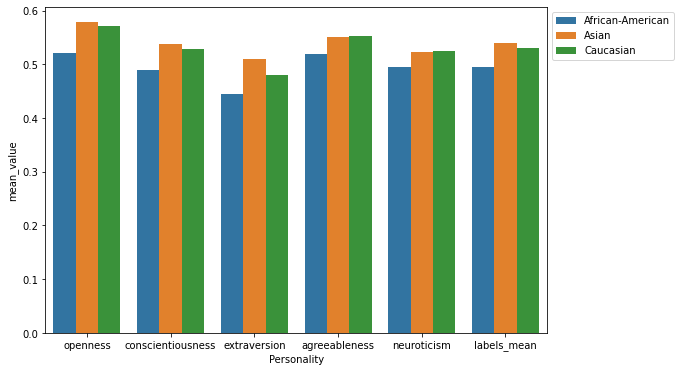

In [111]:
plt.figure(figsize=(9, 6))
sns.barplot(plot_data_eth,x='Personality',y='mean_value',hue='ethnicity_tag')
plt.legend(bbox_to_anchor=(1, 1), loc=2)